# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** I Putu Gunartajaya
- **Email:** gunartajaya2007@gmail.com
- **ID Dicoding:** MS060D5Y0513

## Menentukan Pertanyaan Bisnis

- Apakah terjadi peningkatan penyewaan sepeda ketika pergantian tahun atau malah penurunan?
- Bagaimana pengaruh pergantian musim dalam pola penyewaan sepeda?
- Bagaimana pengaruh pergantian cuaca dalam pola penyewaan sepeda?
- Bagaimana pola penyewaan sepeda berdasarkan waktu yang dilihat berdasarkan harinya?

## Import Semua Packages/Library yang Digunakan

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [39]:
day_df = pd.read_csv('data/data_1.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
hour_df = pd.read_csv('data/data_2.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data diatas merupakan data yang dapat kita gunakan untuk melakukan prediksi penyewaan sepeda baik berdasarkan jam, hari, kondisi cuaca, dll.

### Assessing Data

In [11]:
day_df.isna().sum()
print("Jumlah Duplikat: ", day_df.duplicated().sum())
day_df.info() #kesalahan tipe data pada dteday
day_df.describe()
day_df.isnull().sum()

Jumlah Duplikat:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: dat

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
hour_df.isna().sum()
print("Jumlah Duplikat: ", hour_df.duplicated().sum())
hour_df.info()
hour_df.describe()
hour_df.isnull().sum()

Jumlah Duplikat:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cn

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada masing-masing kolom dteday menggunakan tipe data object, dimana seharusnya menggunakan tipe data datetime
- Pada kolom hr pada hour_df penggunaan tipe datanya salah yaitu object seharusnya menggunakan int karena menunjukkan jam
- Terdapat outlier pada kolom casual, registered dan cnt

### Cleaning Data

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['hr'] = pd.to_numeric(hour_df['hr'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom dteday pada masing-masing data csv sudah diperbaiki dengan menggunakan tipe data yang benar yaitu datetime.
- Untuk outlier yang terjadi pada hour_df, setelah saya cek-cek penyebab lonjakan tersebut terjadi karena merupakan weekday yaitu hari sabtu dan weathersit yang menunjukkan angka 1 yang artinya cuaca cerah. Jadi kesimpulan yang saya ambil saya membiarkan outlier tersebut karena dari hasil pengecekan saya, lonjakan data tersebut dihasilkan karena faktor-faktor yang saya sebutkan diatas.

## Exploratory Data Analysis (EDA)

### Explore Day dan Hour

In [56]:
year_map = {0: '2011', 1: '2012'}
day_copy_df = day_df.copy()
day_copy_df['yr'] = day_copy_df['yr'].map(year_map)
year_compare = day_copy_df.groupby(['yr'])['cnt'].mean().reset_index()
year_compare.head(2)

,yr,cnt
0,2011,3405.761644
1,2012,5599.934426


In [57]:
def waktu(hour):
  if 5 <= hour < 11:
    return "Pagi"
  elif 11 <= hour < 15:
    return "Siang"
  elif 15 <= hour < 18:
    return "Sore"
  else:
    return "Malam"
hour_copy_df = hour_df.copy()
hour_copy_df["hr"] = hour_copy_df["hr"].apply(waktu)
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
hour_copy_df['weekday'] = hour_copy_df['weekday'].map(weekday_map)
pola_pinjam = hour_copy_df.groupby(["weekday", "hr"])["cnt"].mean().reset_index()
hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
pola_pinjam["weekday"] = pd.Categorical(pola_pinjam["weekday"], categories=hari, ordered=True)
pola_pinjam = pola_pinjam.sort_values(by="weekday")
pola_pinjam.head()

,weekday,hr,cnt
27,Senin,Sore,329.737179
25,Senin,Pagi,187.620192
24,Senin,Malam,137.994676
26,Senin,Siang,192.379808
23,Selasa,Sore,339.294872


In [58]:
weather_map = {1: 'Cerah', 2: 'Cerah Berawan', 3: 'Mendung', 4: 'Gerimis'}
hour_copy_df['weathersit'] = hour_copy_df['weathersit'].map(weather_map)
weather_analisa = hour_copy_df.groupby(['weathersit'])['cnt'].mean().reset_index()
weather_analisa.head()

,weathersit,cnt
0,Cerah,204.869272
1,Cerah Berawan,175.165493
2,Gerimis,74.333333
3,Mendung,111.579281


In [62]:
season_map = {1: 'Musim Dingin', 2: 'Musim Semi', 3: 'Musim Panas', 4: 'Musim Gugur'}
day_copy_df['season'] = day_copy_df['season'].map(season_map)
season_analisa = day_copy_df.groupby(['season'])['cnt'].mean().reset_index()
season_analisa.head()

,season,cnt
0,Musim Dingin,2604.132597
1,Musim Gugur,4728.162921
2,Musim Panas,5644.303191
3,Musim Semi,4992.331522


In [72]:
all_df = hour_copy_df.merge(day_copy_df, on='dteday', suffixes=('_hour', '_day'))
all_df.head()
all_df.to_csv("main_data.csv", index=False)

**Insight:**
- Mencari bagaimana perbedaan peningkatkan penyewaan sepeda setelah pergantian tahun, dan ternyata terjadi peningkatkan yang cukup signifikan
- Mencari hubungan pola penyewaan dengan kondisi cuaca, dan ternyata hasilnya ketika cuaca cerah banyak orang yang melakukan penyewaan sepeda, lain hal nya ketika cuacanya gerimis orang-orang jarang melakukan penyewaan sepeda
- Mencari rata-rata penyewaan sepeda berdasarkan waktu yang dikelompokkan dalam data weekday. Hasilnya menunjukkan bahwa pada saat sore hari pola penyewaan sepeda lebih tinggi dari pada pada waktu-waktu yang lain

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terjadi peningkatan penyewaan sepeda ketika pergantian tahun atau malah penurunan?

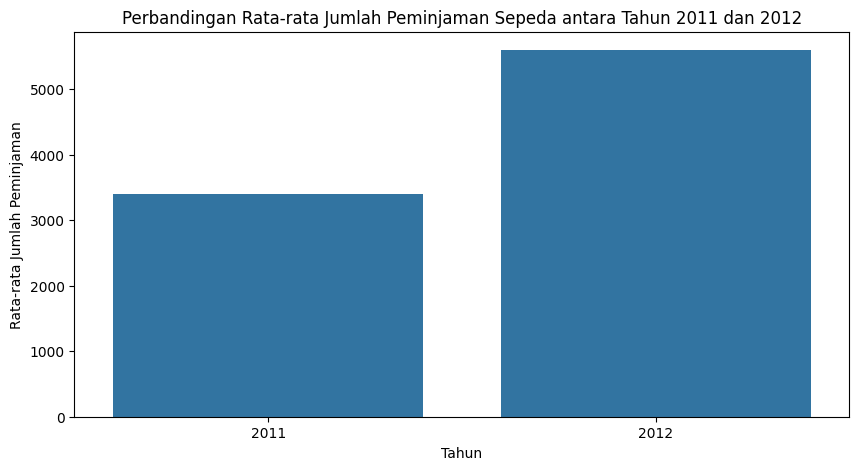

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=year_compare.index, y=year_compare.values)
plt.title('Perbandingan Rata-rata Jumlah Peminjaman Sepeda antara Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

### Pertanyaan 2: Bagaimana pengaruh pergantian musim dalam pola penyewaan sepeda?

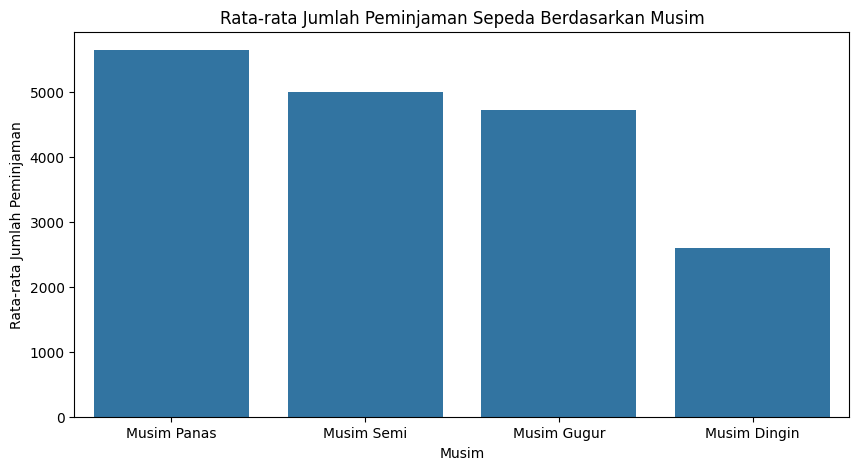

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="cnt", data=season_analisa.sort_values(by="cnt", ascending=False))
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

### Pertanyaan 3: Bagaimana pengaruh pergantian cuaca dalam pola penyewaan sepeda?

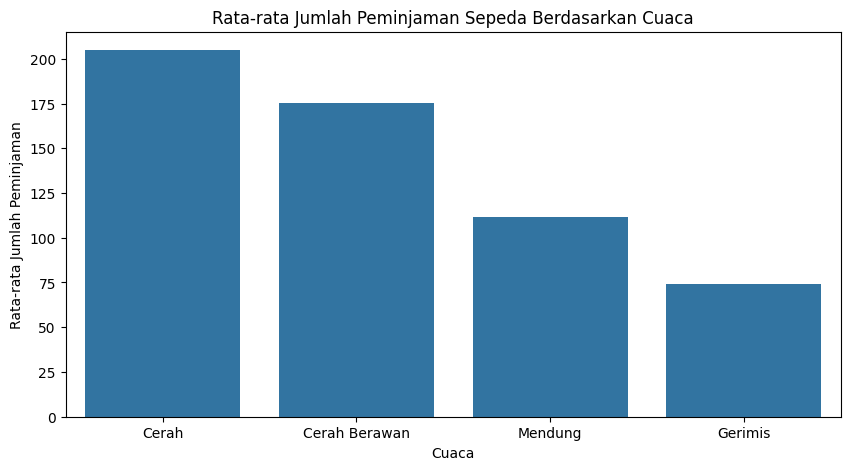

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_analisa.sort_values(by="cnt", ascending=False))
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

### Pertanyaan 3: Bagaimana pengaruh pergantian musim dalam pola penyewaan sepeda?

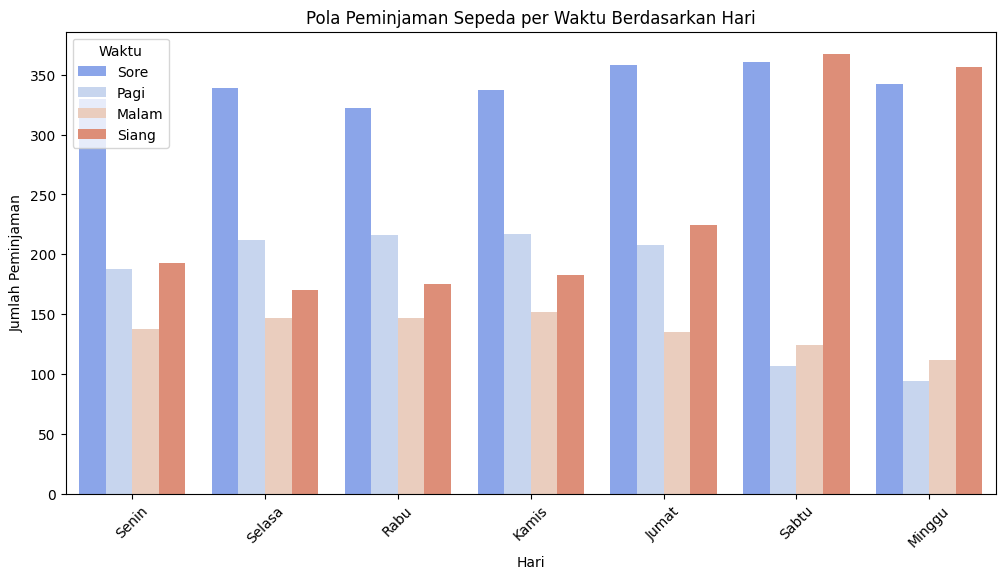

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x="weekday", y="cnt", hue="hr", data=pola_pinjam, palette="coolwarm")
plt.title("Pola Peminjaman Sepeda per Waktu Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Peminjaman")
plt.legend(title="Waktu")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Pada visualisasi data pertama, dapat dilihat bahwa terjadi peningkatan penyewaan sepeda dari tahun 2011 ke tahun 2012
- Pada visualisasi kedua, dapat dilihat bahwa orang-orang cenderung melakukan peminjaman pada saat kondisi cuaca cerah, dan jarang ada orang yang melakukan penyewaan sepeda pada saat kondisi gerimis.
- Pada visualisasi ketiga, dapat dilihat bahwa orang-orang cenderung melakukan peminjaman pada saat memasuki musim panas, dan sedikit ada orang yang melakukan penyewaan sepeda pada saat musim dingin.
- Pada visualisasi data keempat, dapat dilihat bahwa orang-orang cenderung melakukan penyewaan sepeda pada waktu sore hari, namun apabila memasuki weekend (hari sabtu dan minggu), orang-orang cenderung melakukan penyewaan sepeda pada siang hari walaupun beda tipis dengan penyewaan sepeda di sore hari.

## Conclusion

- Kesimpulan dari pertanyaan pertama adalah ternyata terjadi peningkatan penyewaan sepeda yang cukup signifikan setelah pergantian tahun.
- Kesimpulan dari pertanyaan kedua adalah orang-orang cenderung melakukan penyewaan sepeda pada saat cuaca sedang cerah.
- Kesimpulan dari pertanyaan ketiga adalah orang-orang cenderung melakukan penyewaan sepeda pada saat memasuki musim panas.
- Kesimpulan dari pertanyaan keempat adalah berdasarkan waktu ternyata sore hari adalah waktu dimana orang-orang banyak melakukan penyewaan sepeda, berdasarkan hari orang-orang cenderung melakukan penyewaan sepeda pada saat hari weekend (hari sabtu dan minggu)